In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

In [2]:
bank = pd.read_csv(r'../data/bank-full.csv', ";")
bank.head()

C:\Users\HP-PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
"""
Number of rows and columns of the dataframe is checked.
"""
print("Number of rows: ", bank.shape[0])
print("Number of columns: ", bank.shape[1])

Number of rows:  45211
Number of columns:  17


In [4]:
"""
Data type of all the columns are checked.
"""
j = 0
for col in bank.columns:
    j += 1
    print(j, "Column: ", col, " ---> Type: ", bank[col].dtypes)
print(bank.columns)

1 Column:  age  ---> Type:  int64
2 Column:  job  ---> Type:  object
3 Column:  marital  ---> Type:  object
4 Column:  education  ---> Type:  object
5 Column:  default  ---> Type:  object
6 Column:  balance  ---> Type:  int64
7 Column:  housing  ---> Type:  object
8 Column:  loan  ---> Type:  object
9 Column:  contact  ---> Type:  object
10 Column:  day  ---> Type:  int64
11 Column:  month  ---> Type:  object
12 Column:  duration  ---> Type:  int64
13 Column:  campaign  ---> Type:  int64
14 Column:  pdays  ---> Type:  int64
15 Column:  previous  ---> Type:  int64
16 Column:  poutcome  ---> Type:  object
17 Column:  y  ---> Type:  object
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [34]:
"""
The columns are checked if they  are continuous or categorical using .describe or .value_counts 
and by taking a quick look at the features.
"""
j = 0
for col in bank.columns:
    j += 1
    res_col1 = bank[col].describe()
    res_col2 = bank[col].value_counts()
    print(j, "Describe the column: \n", res_col1)
    print("-------------------------------------\n")
    print("Value counts of the column: \n", res_col2)
    print("------------------------------------\n")

1 Describe the column: 
 count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
-------------------------------------

Value counts of the column: 
 32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
------------------------------------

2 Describe the column: 
 count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object
-------------------------------------

Value counts of the column: 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------

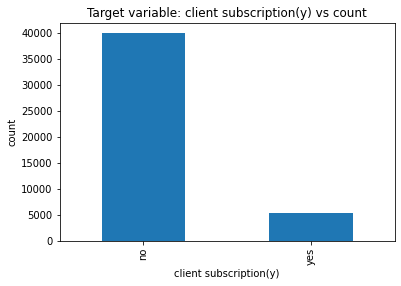

In [5]:
pd.value_counts(bank['y']).plot.bar()
plt.ylabel('count')
plt.xlabel('client subscription(y)')
plt.title("Target variable: client subscription(y) vs count")
plt.plot()
plt.savefig(r"../figures/Target_variable")
plt.show()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

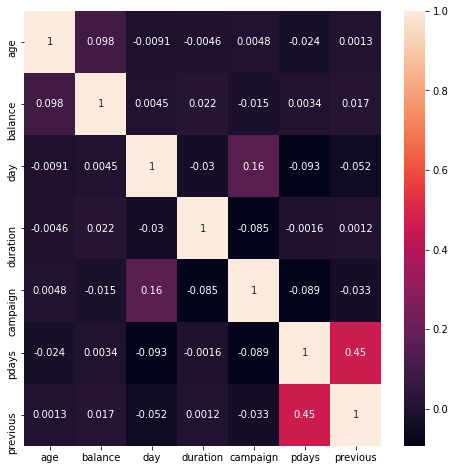

In [5]:
corr = bank.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
bank.columns

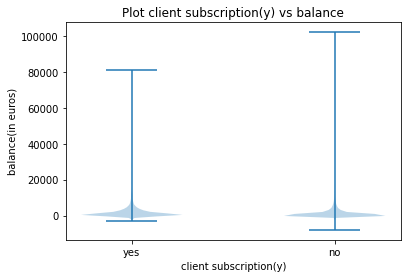

In [6]:
dataset = [bank[bank['y']=='yes']['balance'].values,
           bank[bank['y']=='no']['balance'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('balance(in euros)')
plt.xlabel('client subscription(y)')
plt.title("Plot client subscription(y) vs balance")
plt.plot()
plt.savefig(r"../figures/subscriptionVSbalance")
plt.show()

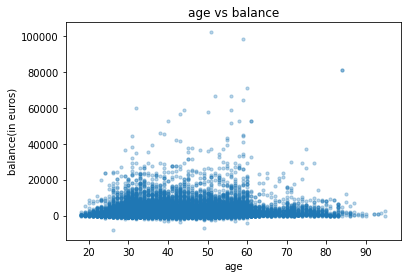

In [7]:
bank.plot.scatter('age','balance',alpha=0.3,s=10)
plt.title('age vs balance')
plt.ylabel('balance(in euros)')
plt.plot()
plt.savefig(r"../figures/ageVSbalance")
plt.show()

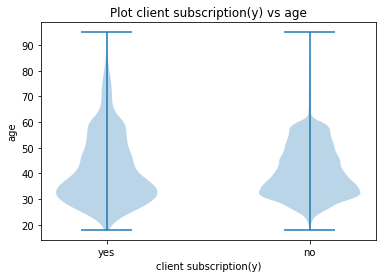

In [8]:
dataset = [bank[bank['y']=='yes']['age'].values,
           bank[bank['y']=='no']['age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('age')
plt.xlabel('client subscription(y)')
plt.title("Plot client subscription(y) vs age")
plt.plot()
plt.savefig(r"../figures/subscriptionVSage")
plt.show()

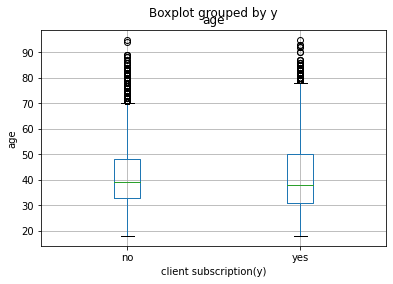

In [9]:
bank[['age','y']].boxplot(by='y')
plt.ylabel('age')
plt.xlabel('client subscription(y)')
# plt.title('Plot client subscription(y) vs age')
plt.plot()
plt.savefig(r"../figures/subscriptionVSage")
plt.show()

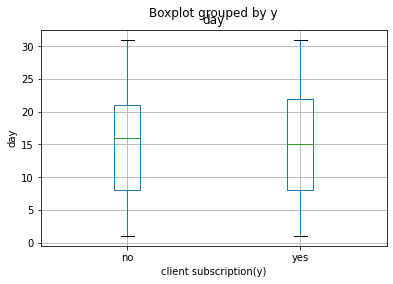

In [10]:
bank[['day','y']].boxplot(by='y')
plt.ylabel('day')
plt.xlabel('client subscription(y)')
plt.plot()
plt.savefig(r"../figures/subscriptionVSday")
plt.show()

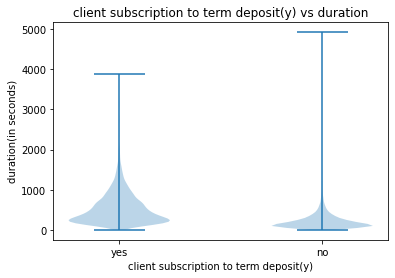

In [11]:
dataset = [bank[bank['y']=='yes']['duration'].values,
           bank[bank['y']=='no']['duration'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('duration(in seconds)')
plt.xlabel('client subscription to term deposit(y)')
plt.title("client subscription to term deposit(y) vs duration")
plt.plot()
plt.savefig(r"../figures/subscriptionVSduration")
plt.show()

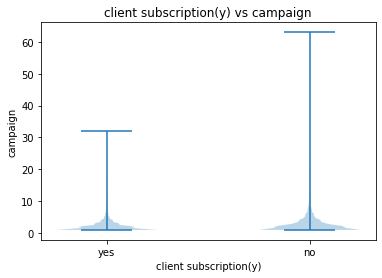

In [12]:
dataset = [bank[bank['y']=='yes']['campaign'].values,
           bank[bank['y']=='no']['campaign'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('campaign')
plt.xlabel('client subscription(y)')
plt.title("client subscription(y) vs campaign")
plt.plot()
plt.savefig(r"../figures/subscriptionVScampaign")
plt.show()

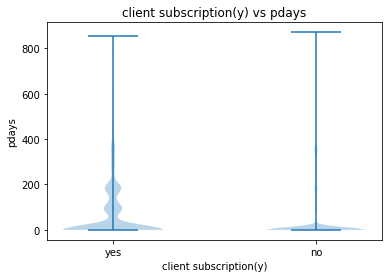

In [13]:
dataset = [bank[bank['y']=='yes']['pdays'].values,
           bank[bank['y']=='no']['pdays'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('pdays')
plt.xlabel('client subscription(y)')
plt.title("client subscription(y) vs pdays")
plt.plot()
plt.savefig(r"../figures/subscriptionVSpdays")
plt.show()

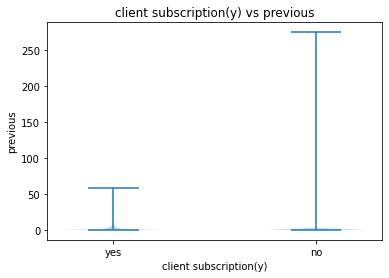

In [14]:
dataset = [bank[bank['y']=='yes']['previous'].values,
           bank[bank['y']=='no']['previous'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('previous')
plt.xlabel('client subscription(y)')
plt.title("client subscription(y) vs previous")
plt.plot()
plt.savefig(r"../figures/subscriptionVSprevious")
plt.show()


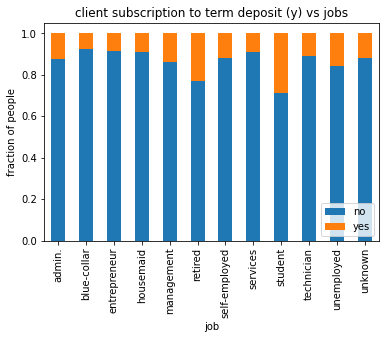

In [15]:
count_matrix = bank.groupby(['job', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription to term deposit (y) vs jobs")
plt.plot()
plt.savefig(r"../figures/subscriptionVSjobs")
plt.show()

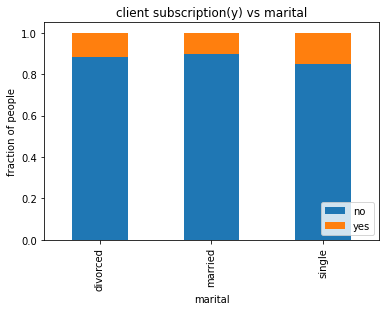

In [16]:
count_matrix = bank.groupby(['marital', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs marital")
plt.plot()
plt.savefig(r"../figures/subscriptionVSmarital")
plt.show()

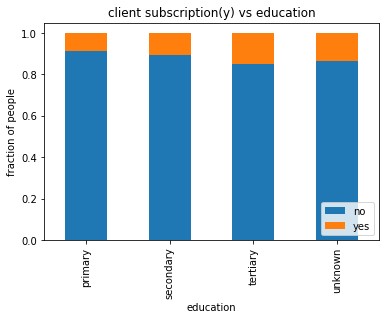

In [17]:
count_matrix = bank.groupby(['education', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs education")
plt.plot()
plt.savefig(r"../figures/subscriptionVSeducation")
plt.show()

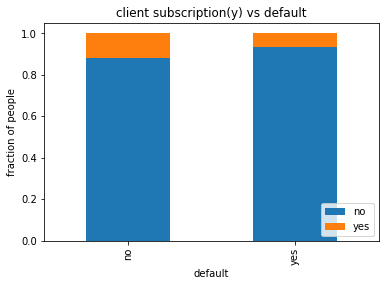

In [18]:
count_matrix = bank.groupby(['default', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs default")
plt.plot()
plt.savefig(r"../figures/subscriptionVSdefault")
plt.show()

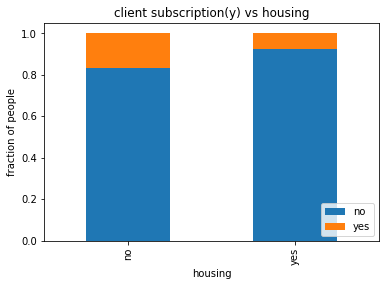

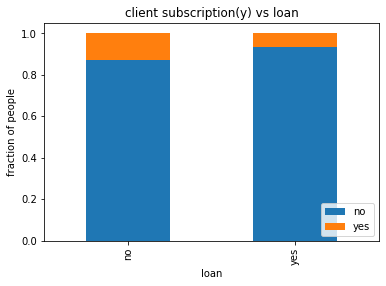

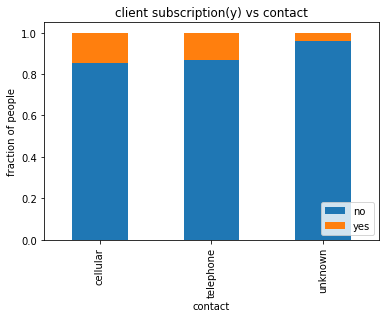

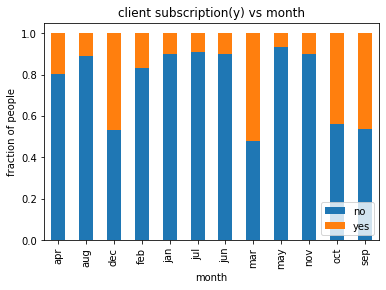

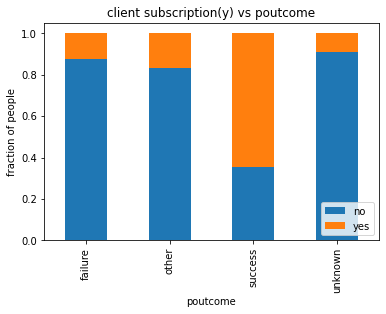

In [19]:
count_matrix = bank.groupby(['housing', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs housing")
plt.plot()
plt.savefig(r"../figures/subscriptionVShousing")
plt.show()

count_matrix = bank.groupby(['loan', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs loan")
plt.plot()
plt.savefig(r"../figures/subscriptionVSloan")
plt.show()

count_matrix = bank.groupby(['contact', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs contact")
plt.plot()
plt.savefig(r"../figures/subscriptionVScontact")
plt.show()

count_matrix = bank.groupby(['month', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs month")
plt.plot()
plt.savefig(r"../figures/subscriptionVSmonth")
plt.show()

count_matrix = bank.groupby(['poutcome', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs poutcome")
plt.plot()
plt.savefig(r"../figures/subscriptionVSpoutcome")
plt.show()

In [7]:
"""
The target variable and other columns are seperated. 
"""
from sklearn.preprocessing import LabelEncoder

# y = pd.DataFrame(LabelEncoder().fit_transform(bank['y'])) 
y = bank['y']
X = bank.loc[:, bank.columns != 'y']

In [8]:
"""
Missing values in the columns are checked below. 
"""
print('data dimensions:',bank.shape)
perc_missing_per_ftr = bank.isnull().sum(axis=0)/bank.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(bank[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(bank.isnull().sum(axis=1)!=0)/bank.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (45211, 17)
fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
"""
The Preprocessors used are: StandardScaler, OneHotEncoder, OrdinalEncoder,
MinMaxScaler. After preprocessing the number of data points and features are 45211
and 34 respectively. The code to find number of features is present in the last code block of this notebook.
"""
ordinal_ftrs = ['education','month','poutcome'] 
ordinal_cats = [['unknown','primary','secondary','tertiary'],['jan','feb','mar','apr','may','jun','jul','aug',\
                    'sep','oct','nov','dec'],['unknown','other','failure','success']]
onehot_ftrs = ['job','marital','default','housing','loan','contact']
minmax_ftrs = ['age']
std_ftrs = ['balance','day','duration','campaign','pdays','previous']
preprocessor = ColumnTransformer(
    transformers=[
    ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
    ('minmax', MinMaxScaler(), minmax_ftrs),
    ('std', StandardScaler(), std_ftrs)])

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score, make_scorer


X_other1, X_test1, y_other1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state=40)
#20% of the data is allocated to testing and other 80% is sent to stratified kfold splitting. 5 fold splitting
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state= 40)
for train_index, val_index in kf.split(X_other1,y_other1):
    X_train1 = X_other1.iloc[train_index]
    y_train1 = y_other1.iloc[train_index]
    X_val1 = X_other1.iloc[val_index]
    y_val1 = y_other1.iloc[val_index] 
#Since the dataset is imbalanced, the baseline model always predict the class value that is most common in the training dataset. 
output_values = [row for row in y_train1]
prediction = max(set(output_values), key=output_values.count)
y_pred1 = [prediction for i in range(len(y_test1))]
y_test1 = np.array(y_test1)

#beta value of 1.5 is chosen because the dataset is imbalanced and the problem is cheap to act. 
b = 1.5
fscore = fbeta_score(y_test1, y_pred1, average='weighted' ,beta=1.5)
print("Baseline score:", fscore)
f_baseline = open(r"../Results/baseline_result", "a")
f_baseline.write("Baseline score:"+str(fscore))
f_baseline.close()

Baseline score: 0.8471383201662915


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score


def MLpipe(X, y, preprocessor, ML_algo, param_grid):
    
    grid_lst = []
    val_scores = []
    test_scores = []
    random_state = [5, 10, 13, 20, 25]#5 different random states are chosen
    for i in range(len(random_state)):
        #stratified kfold splitting with 5 fold splitting
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.2, random_state=40*i)    
        kf = StratifiedKFold(n_splits=5,shuffle=True,random_state= 40*i)
        #Pipeline
        pipe = Pipeline(steps=[('preprocessor', preprocessor), ('ML_algo', ML_algo)])
        # GridSearchCV is used as it helps in hyperparameter tuning
        grid = GridSearchCV(pipe, param_grid=param_grid, scoring = make_scorer(fbeta_score, average='weighted', beta=1.5), return_train_score = True ,cv=kf, n_jobs=-1, verbose=True)
        #It is fit on other data
        grid.fit(X_other, y_other)
        #predicted on test data and f_beta score is used.
        y_test_pred = grid.predict(X_test)
        test_scores.append(fbeta_score(y_test, y_test_pred, average='weighted', beta=1.5))
        grid_lst.append(grid.best_params_)
        #Collect the models with best parameters and test scores and return them
    return grid_lst, test_scores
        

In [17]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#write the results into the file l1_results
filel1 = open(r"../Results/l1_results", "a")  

#parameters that needs to be tuned
param_grid = {'ML_algo__penalty':['l1'], 'ML_algo__C':[100.0, 35.938136638046274, 12.91549665014884, 4.641588833612779, 1.668100537200059, 0.5994842503189408, 0.21544346900318845, 0.07742636826811278, 0.027825594022071257, 0.01],  'ML_algo__solver':['saga'], 'ML_algo__max_iter':[100000000]} 
l1_model, l1_test_sc = MLpipe(X, y, preprocessor, LogisticRegression(), param_grid)
#models with best parameters and their f_beta scores
print("-----------------------------")
filel1.write("L1 Models:")
for m in l1_model:
    print(m)
    filel1.write("\n"+str(m))
print("-----------------------------")
filel1.write("\n**********************")
filel1.write("\nL1 test scores:")
for s in l1_test_sc:
    print(s)
    filel1.write("\n"+str(s))
print("-----------------------------")
print('beta score:',"(mean)",np.mean(l1_test_sc),'+/-', np.std(l1_test_sc),"(standard deviation)")
filel1.write("\nbeta score: (mean)"+str(np.mean(l1_test_sc))+'+/-'+ str(np.std(l1_test_sc))+"(standard deviation)")
filel1.close()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
-----------------------------
{'ML_algo__C': 100.0, 'ML_algo__max_iter': 100000000, 'ML_algo__penalty': 'l1', 'ML_algo__solver': 'saga'}
{'ML_algo__C': 35.938136638046274, 'ML_algo__max_iter': 100000000, 'ML_algo__penalty': 'l1', 'ML_algo__solver': 'saga'}
{'ML_algo__C': 1.668100537200059, 'ML_algo__max_iter': 100000000, 'ML_algo__penalty': 'l1', 'ML_algo__solver': 'saga'}
{'ML_algo__C': 100.0, 'ML_algo__max_iter': 100000000, 'ML_algo__penalty': 'l1', 'ML_algo__solver': 'saga'}
{'ML_algo__C': 100.0, 'ML_algo__max_iter': 100000000, 'ML_algo__penalty': 'l1', 'ML_algo__solver': 'saga'}
-----------------------------
0.8822855135248232
0.8859532335507246
0.8847846533034557
0.8866302534997025

In [18]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#write the results into the file l2_results
filel2 = open(r"../Results/l2_results", "a") 
#parameters that needs to be tuned
param_grid = {'ML_algo__penalty':['l2'], 'ML_algo__C':[100.0, 35.938136638046274, 12.91549665014884, 4.641588833612779, 1.668100537200059, 0.5994842503189408, 0.07742636826811278, 0.027825594022071257, 0.01],  'ML_algo__solver':['saga'], 'ML_algo__max_iter':[100000000]} 
l2_model, l2_test_sc = MLpipe(X, y, preprocessor, LogisticRegression(), param_grid)
#models with best parameters and their f_beta scores
print("-----------------------------")
filel2.write("L2 Models:")
for m in l2_model:
    print(m)
    filel2.write("\n"+str(m))
print("-----------------------------")
for s in l2_test_sc:
    print(s)
    filel2.write("\n"+str(s))
print("-----------------------------")
print('beta score:',"(mean)",np.mean(l2_test_sc),'+/-', np.std(l2_test_sc),"(standard deviation)")
filel2.write("\nbeta score: (mean)"+str(np.mean(l2_test_sc))+'+/-'+ str(np.std(l2_test_sc))+"(standard deviation)")
filel2.close()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
-----------------------------
{'ML_algo__C': 100.0, 'ML_algo__max_iter': 100000000, 'ML_algo__penalty': 'l2', 'ML_algo__solver': 'saga'}
{'ML_algo__C': 0.5994842503189408, 'ML_algo__max_iter': 100000000, 'ML_algo__penalty': 'l2', 'ML_algo__solver': 'saga'}
{'ML_algo__C': 0.5994842503189408, 'ML_algo__max_iter': 100000000, 'ML_algo__penalty': 'l2', 'ML_algo__solver': 'saga'}
{'ML_algo__C': 100.0, 'ML_algo__max_iter': 100000000, 'ML_algo__penalty': 'l2', 'ML_algo__solver': 'saga'}
{'ML_algo__C': 100.0, 'ML_algo__max_iter': 100000000, 'ML_algo__penalty': 'l2', 'ML_algo__solver': 'saga'}
-----------------------------
0.8822855135248232
0.8861351426762922
0.8847846533034557
0.8866302534997025
0.8

In [19]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

#write the results into the file rf_results
filerf = open(r"../Results/rf_results", "a") 
#parameters that needs to be tuned
param_grid = {'ML_algo__max_depth': [1, 3, 5, 7, 10, 25], 'ML_algo__max_features': [1, 3, 5, 7, 10, 25], 'ML_algo__n_jobs':[-1], 'ML_algo__min_samples_split':[2,5,7]} 
rf_model, rf_test_sc = MLpipe(X, y, preprocessor, RandomForestClassifier(), param_grid)
print("-----------------------------")
#models with best parameters and their f_beta scores
filerf.write("RF Models:")
for m in rf_model:
    print(m)
    filerf.write("\n"+str(m))
print("-----------------------------")
for s in rf_test_sc:
    print(s)
    filerf.write("\n"+str(s))
print("-----------------------------")
print('test accuracy:',"(mean)",np.mean(rf_test_sc),'+/-',np.std(rf_test_sc),"(standard deviation)")
filerf.write("\nbeta score: (mean)"+str(np.mean(rf_test_sc))+'+/-'+ str(np.std(rf_test_sc))+"(standard deviation)")
filerf.close()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
-----------------------------
{'ML_algo__max_depth': 25, 'ML_algo__max_features': 25, 'ML_algo__min_samples_split': 5, 'ML_algo__n_jobs': -1}
{'ML_algo__max_depth': 25, 'ML_algo__max_features': 25, 'ML_algo__min_samples_split': 7, 'ML_algo__n_jobs': -1}
{'ML_algo__max_depth': 25, 'ML_algo__max_features': 25, 'ML_algo__min_samples_split': 7, 'ML_algo__n_jobs': -1}
{'ML_algo__max_depth': 25, 'ML_algo__max_features': 25, 'ML_algo__min_samples_split': 7, 'ML_algo__n_jobs': -1}
{'ML_algo__max_depth': 25, 'ML_algo__max_features': 25, 'ML_algo__min_samples_split': 7, 'ML_algo__n_jobs': -1}
-----------------------------
0.8974698246664589
0.8987751078350174
0.8993459865205568
0.902199

In [39]:
import xgboost
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings("ignore")

#write the results into the file rf_results
filexgb = open(r"../Results/xgb_results", "a")

random_state = [5, 10, 13, 20, 25]
all_val_scores = []
all_train_scores = []
all_test_scores = []

train_scores_mean = []
val_scores_mean = []
test_scores_mean = []

train_scores_std = []
val_scores_std = []
test_scores_std = []

for i in random_state:#looping through 5 random states
    X_other1, X_test1, y_other1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state=i)    
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state= i)
    for train_index, val_index in kf.split(X_other1,y_other1):
        X_train1 = X_other1.iloc[train_index]
        y_train1 = y_other1.iloc[train_index]
        X_CV = X_other1.iloc[val_index]
        y_CV = y_other1.iloc[val_index]
            
        
    pipeline_fit = Pipeline(steps=[('preprocessor', preprocessor)]) 
        
    X_train1 = pipeline_fit.fit_transform(X_train1)
                        
    X_CV = pipeline_fit.transform(X_CV)

    X_test1 = pipeline_fit.transform(X_test1)
        
    depth_add = []
    sm_add = []
    test_scores = []
    train_scores = []
    val_scores = []
    
    max_dep = [1, 2, 3, 6]#parameter to be tuned
    subsample = [0.4, 0.5, 0.66]#parameter to be tuned
    #looping through the parameters to find the best parameter combination
    for md in max_dep: 
        for sm in subsample:
            param_grid = {"learning_rate": [0.03],
                              "n_estimators": [10000],
                              "max_depth": [md],
                              "colsample_bytree": [0.9],              
                              "subsample": [sm]}

            XGB = xgboost.XGBClassifier()
            XGB.set_params(**ParameterGrid(param_grid)[0])
            XGB.fit(X_train1,y_train1,early_stopping_rounds=40,eval_set=[(X_CV, y_CV)], verbose=False)
            y_CV_pred = XGB.predict(X_CV)
            f_CV = fbeta_score(y_CV, y_CV_pred, average='weighted', beta=1.5)
            val_scores.append(f_CV)
           
            y_train_pred = XGB.predict(X_train1)
            f_train = fbeta_score(y_train1, y_train_pred, average='weighted', beta=1.5)
            train_scores.append(f_train)
            
            y_test_pred = XGB.predict(X_test1)
            f_test = fbeta_score(y_test1, y_test_pred, average='weighted', beta=1.5)
            #f_beta scores are appended
            test_scores.append(f_test)
            #corresponding max_depth and subsample values are stored
            depth_add.append(md)
            sm_add.append(sm)
                                    
            
    #mean of the scores        
    train_scores_mean.append(np.mean(train_scores))
    val_scores_mean.append(np.mean(val_scores))
    test_scores_mean.append(np.mean(test_scores))
    #standard deviation of the scores        
    train_scores_std.append(np.std(train_scores))
    val_scores_std.append(np.std(val_scores))
    test_scores_std.append(np.std(test_scores))
    #store all the scores
    all_val_scores.append(val_scores_mean)
    all_train_scores.append(train_scores_mean)
    all_test_scores.append(test_scores_mean)
            
    print("********************************************")
    filexgb.write("\n************************************")
    #Display the model with best parameters for each random state.
    print("RANDOM STATE: ", i)
    filexgb.write("\nRANDOM STATE: "+str(i))
    print("Best test scores: ", np.max(test_scores), " ---->   Best max_depth: ", depth_add[np.array(test_scores).argmax()], " Best subsample: ", sm_add[np.array(test_scores).argmax()], "learning_rate: 0.03,  n_estimators: 10000, colsample_bytree: 0.9")
    #write the results into the file
    filexgb.write("\nBest test scores: "+str(np.max(test_scores))+" ---->   Best max_depth: "+str(depth_add[np.array(test_scores).argmax()])+ "Best subsample: "+str(sm_add[np.array(test_scores).argmax()])+"learning_rate: 0.03,  n_estimators: 10000, colsample_bytree: 0.9")
print("Beta score:(mean)",np.mean(all_test_scores),'+/-',np.std(all_test_scores),"(standard deviation)")
filexgb.write("Beta score:(mean)"+str(np.mean(all_test_scores))+"+/-"+str(np.std(all_test_scores))+"(standard deviation)")
filexgb.close()

[00:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:32:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:41:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:42:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:51:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

file_eval = open(r"../Results/xgb_best_model_eval", "a")
#write into the file xgb_best_model_eval
all_val_scores = []
all_train_scores = []
all_test_scores = []

train_scores_mean = []
val_scores_mean = []
test_scores_mean = []

train_scores_std = []
val_scores_std = []
test_scores_std = []

y = pd.DataFrame(LabelEncoder().fit_transform(bank['y']))
X = bank.loc[:, bank.columns != 'y']

ordinal_ftrs = ['education','month','poutcome'] #preprocessing
ordinal_cats = [['unknown','primary','secondary','tertiary'],['jan','feb','mar','apr','may','jun','jul','aug',\
                    'sep','oct','nov','dec'],['unknown','other','failure','success']]
cat_ftrs = ['job','marital','default','housing','loan','contact']
minmax_ftrs = ['age']
std_ftrs = ['balance','day','duration','campaign','pdays','previous']

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

ordinal_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories = ordinal_cats))])


numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

minmax_transformer = Pipeline(steps=[('minmax', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('minmax', minmax_transformer, minmax_ftrs)]) 



test_scores = []
train_scores = []
val_scores = []
xgb_store = []

random_states = [1,2,3,4,15,26,37,48,49,50]#looping over 10 random states
for i in random_states:
        X_other1, X_test1, y_other1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state=i)
        #stratified kfold splitting with 5 fold splitting
        kf = StratifiedKFold(n_splits=5,shuffle=True,random_state= i)
        for train_index, val_index in kf.split(X_other1,y_other1):
            X_train1 = X_other1.iloc[train_index]
            y_train1 = y_other1.iloc[train_index]
            X_CV = X_other1.iloc[val_index]
            y_CV = y_other1.iloc[val_index]

        pipeline_fit = Pipeline(steps=[('preprocessor', preprocessor)]) 
        #fit and transform
        X_train1 = pipeline_fit.fit_transform(X_train1)

        X_CV = pipeline_fit.transform(X_CV)

        X_test1 = pipeline_fit.transform(X_test1)
        #get feature names
        feature_names = preprocessor.transformers_[0][-1] + \
                list(preprocessor.named_transformers_['cat'][0].get_feature_names(onehot_ftrs)) + \
                preprocessor.transformers_[2][-1] + preprocessor.transformers_[3][-1]
    
        X_train1 = pd.DataFrame(data=X_train1,columns=feature_names)
        X_CV = pd.DataFrame(data=X_CV,columns=feature_names)
        X_test1 = pd.DataFrame(data=X_test1,columns=feature_names)
        #parameters are set to the best parameters that we found after hyperparameter tuning form the previous code block
        #best max_depth is found to be 6 and best subsample is found to be 0.5. Hence, the parameter as set to those values.
        param_grid = {"learning_rate": [0.03],
                              "n_estimators": [10000],
                              "max_depth": [6],
                              "colsample_bytree": [0.9],              
                              "subsample": [0.5]}

        XGB = xgboost.XGBClassifier()
        XGB.set_params(**ParameterGrid(param_grid)[0])
        XGB.fit(X_train1,y_train1,early_stopping_rounds=40,eval_set=[(X_CV, y_CV)], verbose=False)
        y_CV_pred = XGB.predict(X_CV)
        f_CV = fbeta_score(y_CV, y_CV_pred, average='weighted', beta=1.5)
        val_scores.append(f_CV)
           
        y_train_pred = XGB.predict(X_train1)
        f_train = fbeta_score(y_train1, y_train_pred, average='weighted', beta=1.5)
        train_scores.append(f_train)
            
        y_test_pred = XGB.predict(X_test1)
        #get f_beta score
        f_test = fbeta_score(y_test1, y_test_pred, average='weighted', beta=1.5)
        test_scores.append(f_test)
        #store the corresponding models
        xgb_store.append(XGB)

#print the best score and it's random state
#print the mean f_beta score and it's standard deviation.
print("************************************************************")
print("Best test score: ", np.max(test_scores)," Random state: ", random_states[np.array(test_scores).argmax()])
file_eval.write("Best test score: "+str(np.max(test_scores))+" Random state: "+str(random_states[np.array(test_scores).argmax()]))
print('Beta score:',"(mean)", np.mean(test_scores),'+/-',np.std(test_scores),"(standard deviation)")
file_eval.write('Beta score:(mean)'+str(np.mean(test_scores))+'+/-'+str(np.std(test_scores))+"(standard deviation)")
file_eval.close()

[01:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:02:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

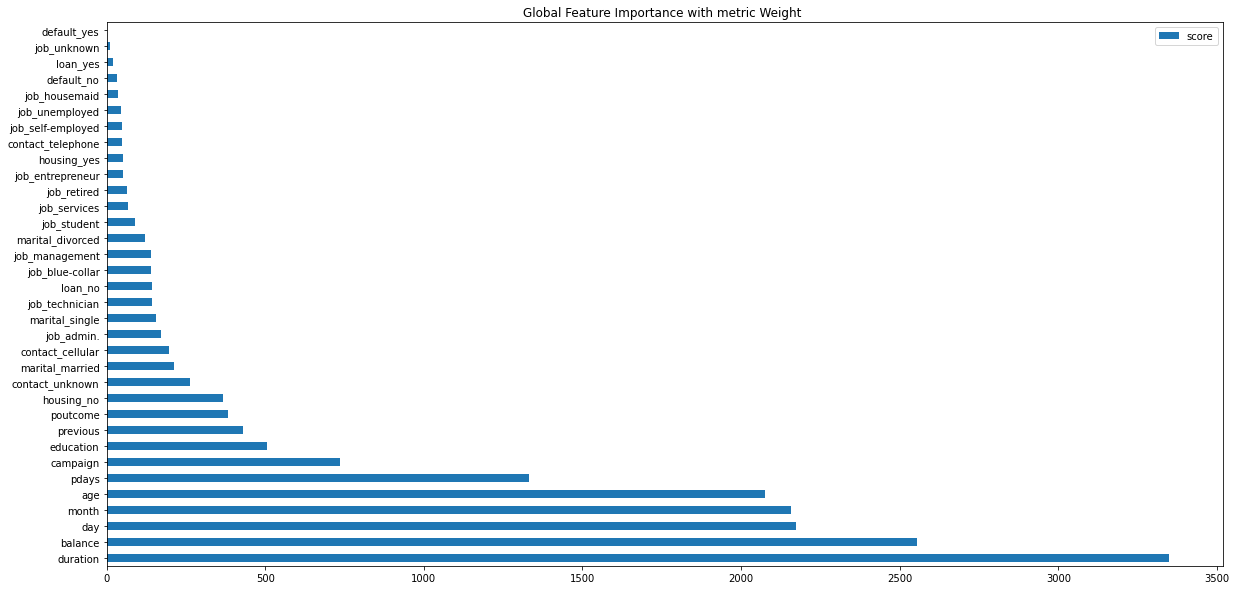

In [31]:
#Global feature importance with metric weight
feature_important = XGB.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))
plt.title("Global Feature Importance with metric Weight ")
plt.savefig(r"../figures/Global Feature Importance with metric Weight")

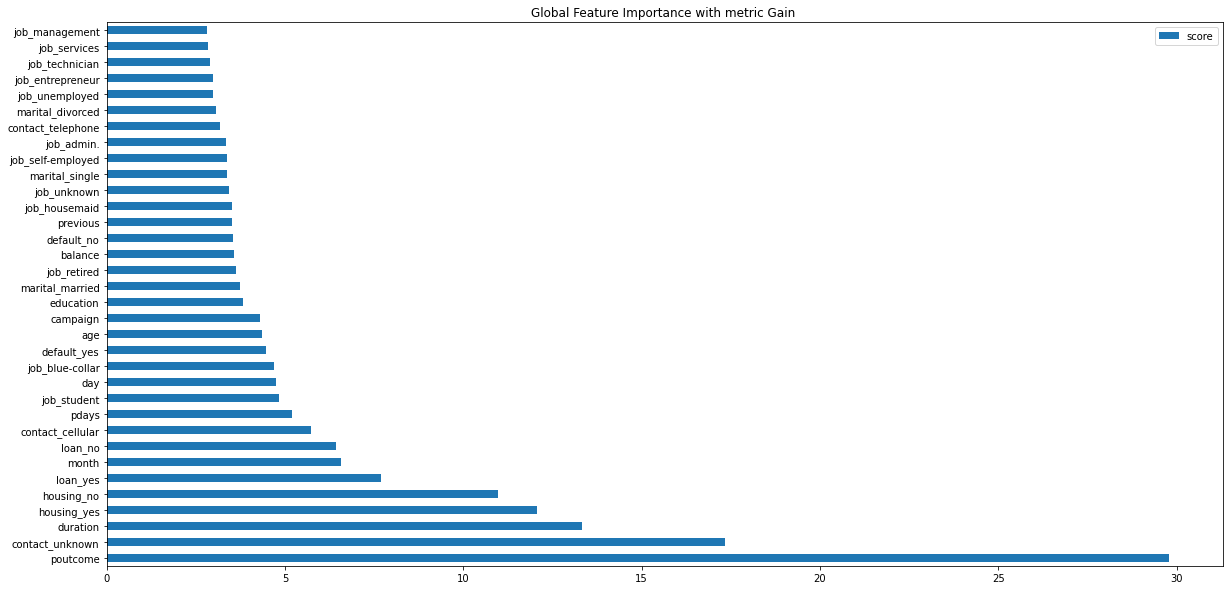

In [32]:
#Global feature importance with metric Gain
feature_important = XGB.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))
plt.title("Global Feature Importance with metric Gain ")
plt.savefig(r"../figures/Global Feature Importance with metric gain")

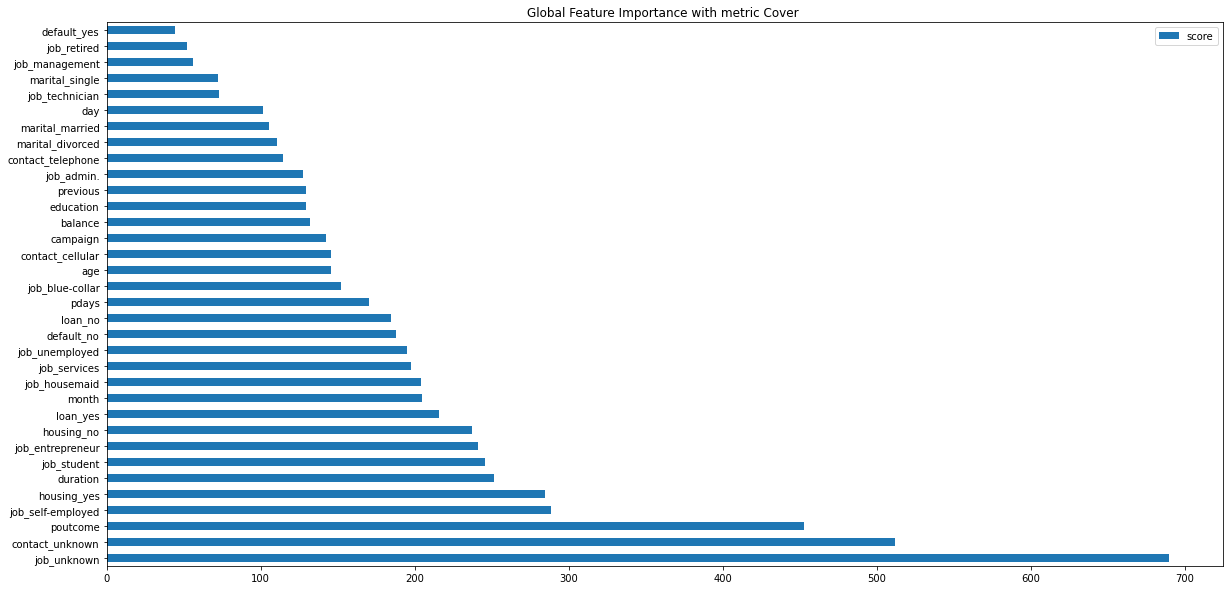

In [33]:
#Global feature importance with metric cover
feature_important = XGB.get_booster().get_score(importance_type='cover')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))
plt.title("Global Feature Importance with metric Cover ")
plt.savefig(r"../figures/Global Feature Importance with metric cover")

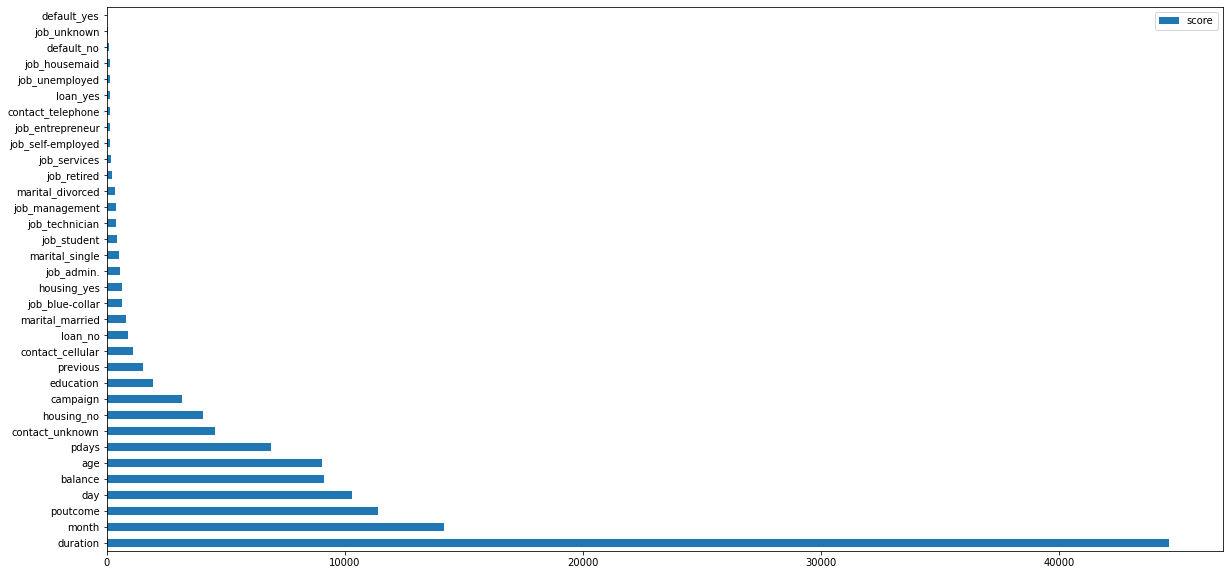

In [34]:
#Global feature importance with metric total_gain
feature_important = XGB.get_booster().get_score(importance_type='total_gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))
plt.savefig(r"../figures/Global Feature Importance with metric Total gain")

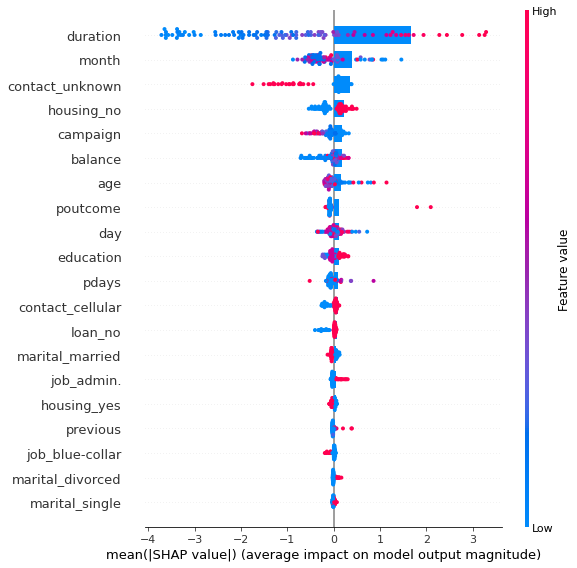

In [35]:
#Local feature importance is calculated using SHAP
import shap
shap.initjs() 
X_sampled = X_train1.sample(100, random_state=10)
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_sampled)
shap.summary_plot(shap_values, X_sampled, show=False)
plt.savefig(r"../figures/SHAP1")
shap.summary_plot(shap_values, X_sampled, plot_type="bar",show=False)
plt.savefig(r"../figures/SHAP2")

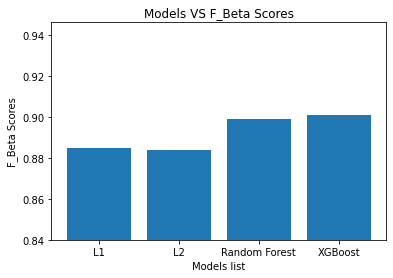

In [40]:
models_lst = ["L1", "L2", "Random Forest", "XGBoost"]
beta_score = [0.885,0.884, 0.899, 0.901]

plt.bar(models_lst, beta_score)
plt.ylim(ymin=0.84)
plt.xlabel("Models list")
plt.ylabel("F_Beta Scores")
plt.title("Models VS F_Beta Scores")
plt.savefig(r"../figures/Models VS F_Beta Scores")
plt.show()

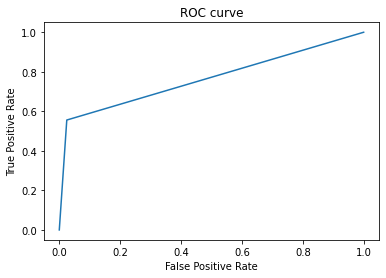

In [43]:
from sklearn import metrics
y_test_pred1 = xgb_store[np.array(test_scores).argmax()].predict(X_test1)

fpr,tpr,p_crits =  metrics.roc_curve(y_test1, y_test_pred1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig(r"../figures/ROC")
plt.show()

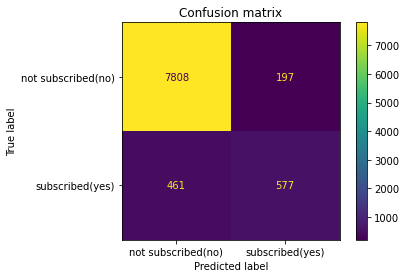

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test1, y_test_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not subscribed(no)','subscribed(yes)'])
disp.plot()
plt.title("Confusion matrix")
plt.savefig(r"../figures/Confusion matrix")
plt.show()

In [109]:
len(feature_names)

34